# Tutorial

In [1]:
import morphopy

## Loading in a morphology

MorphoPy can preprocess standard `.swc` format and `.imx` files from Imaris/Filament Tracer.

`Morph()` object takes two argument: filepath and preprocess.  By setting `preprocess=True`, MorphoPy will check and remove duplicate data points in data, if they exist, and also connect all the disconnected parts to one single neuronal tree, as it always happened in messy raw data. If you are sure your data is clean and don't need any preprocessing, you can turn it off. **Noted**, only `swc` is supported without preprocessing when `preprocess=False`.

   

A short summary of data quality will return when reading data.

In [15]:
m = morphopy.Morph(filepath='data/eNGC-j140908b cell 1.SWC', preprocess=True)

INFO:root:  Data: data/eNGC-j140908b cell 1.SWC
INFO:root:  unit: um
INFO:root:  ===================  

INFO:root:  Reading data/eNGC-j140908b cell 1.SWC

INFO:root:  Checking duplicate points in data.
INFO:root:	0 duplicate points are found.

INFO:root:  Creating path arrays from voxel data points.

INFO:root:  Checking path connection.
INFO:root:	Total num of paths to check: 342

INFO:root:  No disconnected paths.

INFO:root:  ===================  
INFO:root:  Checking neurites...   

INFO:root:  Has soma (Type 1)?
INFO:root:	Yes

INFO:root:  Has axon (Type 2)?
INFO:root:	Yes

INFO:root:  Has basal dendrites (Type 3)?
INFO:root:	Yes

INFO:root:  Has apical dendrites (Type 4)?
INFO:root:	No

INFO:root:  Has undefined or custom types (Type 0/5)?
INFO:root:	No



## Morphometric summary statistics

MorphoPy can calculate morphometric statistics about a morphology. 
    

In [16]:
m.summarize()

INFO:root:  Calculating path statistics (e.g. real length, branching order...)
INFO:root:  Calculating summary data...
INFO:root:  Calculating density data...
INFO:root:  Calculating persistance barcode...


In [7]:
m.show_summary()

INFO:root:  Summary of the cell
INFO:root:  ======================

INFO:root:  BASAL_DENDRITES

INFO:root:    Number of arbor segments: 237
INFO:root:    Number of branch points: 117
INFO:root:    Number of irreducible nodes: 238
INFO:root:    Max branching order: 12

INFO:root:    Asymmetry: 9.478
INFO:root:    Radius: 290.564
INFO:root:    Field Area: 234.083 ×10³ um²

INFO:root:  ## Angle 

INFO:root:    Average nodal angle in degree: 85.173
INFO:root:    Average nodal angle in radian: 1.487
INFO:root:    Average local angle in degree: 89.097
INFO:root:    Average local angle in radian: 1.555 

INFO:root:  ## Average tortuosity: 1.158

INFO:root:  ## Real length (μm)

INFO:root:    Sum: 10814.737
INFO:root:    Mean: 45.632
INFO:root:    Median: 28.874
INFO:root:    Min: 1.000
INFO:root:    Max: 311.828

INFO:root:  ## Euclidean length (μm)

INFO:root:    Sum: 9021.882
INFO:root:    Mean: 38.067
INFO:root:    Median: 27.019
INFO:root:    Min: 1.000
INFO:root:    Max: 241.649

INFO:r

TODO explain the different statistics

## Plotting 

`Morph.show_morph(view)` supports plotting the morphology of the cell in three different view points:

    - top view: xy
    - front view: xz
    - side view: yz 

The cell body is depicted as a grey circle. Each branch point is marked with a circle. The color codes for branch order. The higher the branch order the brighter the color. Different neurite types are color-coded:

    - axon: blue
    - basal dendrites: red
    - apical dendrites: purples

(<matplotlib.figure.Figure at 0x7eff46d00c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7eff3b2f1978>)

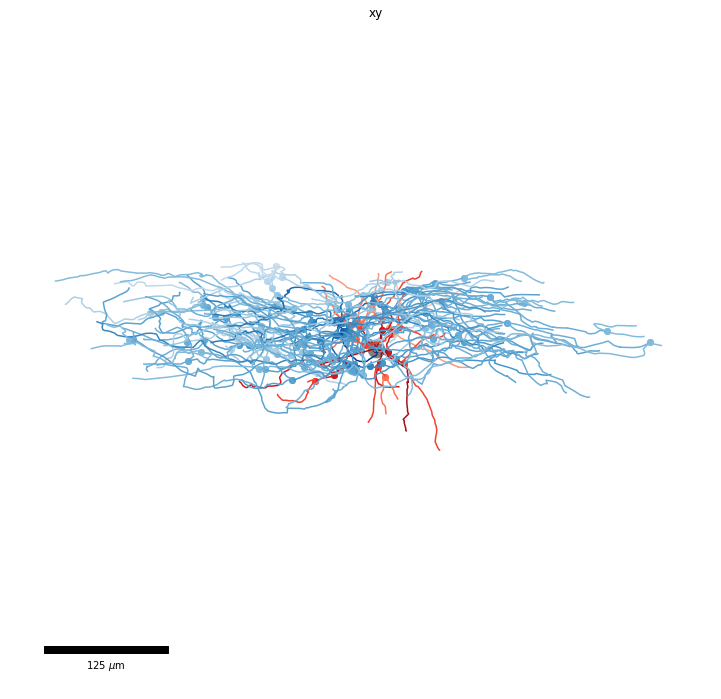

In [17]:
%matplotlib inline
m.show_morph(view='xy')

`Morph.show_treeviews()` will plot all three views at the same time.

(<matplotlib.figure.Figure at 0x7eff39c5b358>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff3d808358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7eff3aec2780>], dtype=object))

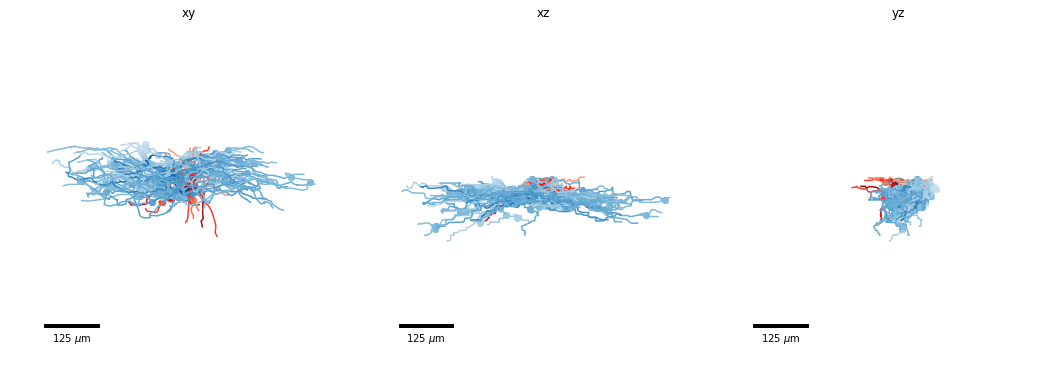

In [18]:
m.show_threeviews()

`Morph.show_animation()` will generate a mp4 vedio of the cell morphology in 3D. 

In [7]:
# m.show_animation()

(The example cell shown here is a pyramidal cell from enthorhinal cortex ([Garden et al., 2008](https://www.ncbi.nlm.nih.gov/pubmed?term=20720120)), taken from Neuromorpho.org http://neuromorpho.org/neuron_info.jsp?neuron_name=EC3-80604)

(<matplotlib.figure.Figure at 0x7f5eaf28aa58>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e2cf40550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5e2ce32940>], dtype=object))

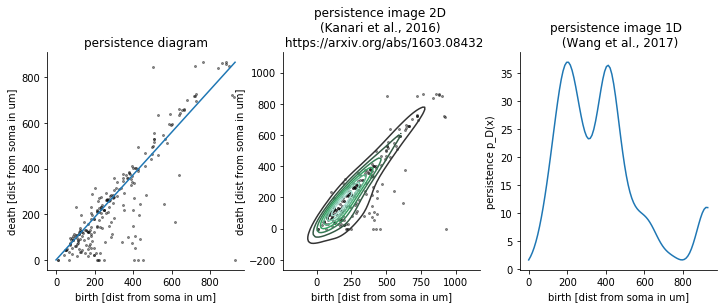

In [8]:
m.show_persistence_diagram()

# Saving summary data and  processed swc

Summary result and processed swc can be saved by calling:

* m.save_summary(overwrite=True)
* m.save_swc(overwrite=True)